In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('C:\\Users\\ThikPad\\Documents\\py\\MBA.csv')
data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [13]:
data['admission'] = data['admission'].fillna('Reject')

In [14]:
admission_mapping = {'Admit': 1, 'Waitlist': 2, 'Reject': 0}
data['admission'] = data['admission'].map(admission_mapping)

In [20]:
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['international'] = data['international'].astype(int)  # Convert boolean to int


In [15]:
data['race'] = data['race'].fillna('Unknown')

In [21]:
data = pd.get_dummies(data, columns=['major', 'race', 'work_industry'])

In [22]:
data = data.drop('application_id', axis=1)

In [24]:
X = data.drop('admission', axis=1)
y = data['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [28]:
y_pred = svm_model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Reject', 'Admit', 'Waitlist']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Reject       0.82      1.00      0.90      1525
       Admit       0.00      0.00      0.00       299
    Waitlist       0.00      0.00      0.00        35

    accuracy                           0.82      1859
   macro avg       0.27      0.33      0.30      1859
weighted avg       0.67      0.82      0.74      1859


Confusion Matrix:
[[1525    0    0]
 [ 299    0    0]
 [  35    0    0]]

Accuracy Score: 0.8203335126412049


c:\Users\ThikPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ThikPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ThikPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


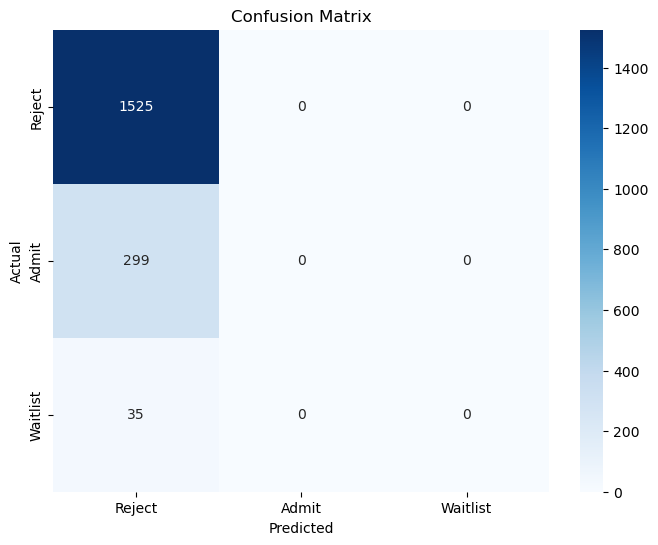

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', 
            cmap='Blues',
            xticklabels=['Reject', 'Admit', 'Waitlist'],
            yticklabels=['Reject', 'Admit', 'Waitlist'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()